In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt


def show_frequency(path, labelName = 'label',contextName = 'root_text',word_count = 50,fileName='toxic_word_freq',toxicity = 1,color = 'orangered'):

    df = pd.read_csv(path)
    
    # create a new dataFrame with only the needed columns
    try:
        df = df[[labelName, contextName]]
    except KeyError as e:
        print(f"Column error: {e}")
        return
        
    # 'label' sütununda toksik (1) olanları filtrele
    toxic_texts = df[df[labelName] == toxicity][contextName]
    
    title = 'Toksik olmayan'
    if toxicity==1:
        title = 'Toksik'
    
    # Tüm toksik cümlelerdeki kelimeleri birleştir
    all_words = " ".join(str(text) for text in toxic_texts).split()
    
    # Kelime frekanslarını hesapla
    word_counts = Counter(all_words)
    
    # En sık geçen ilk 20 kelimeyi seç
    most_common_words = word_counts.most_common(word_count)
    
    # Kelimeleri ve frekanslarını ayrı listelere ayır
    words, counts = zip(*most_common_words)
    
    # Çubuk grafiği oluştur
    plt.figure(figsize=(word_count/2, word_count/5))
    plt.bar(words, counts, color=color)
    plt.xlabel("Kelimeler")
    plt.ylabel("Frekans")
    plt.title(f"{title} Cümlelerde En Sık Geçen {word_count} Kelime")
    plt.xticks(rotation=45)
    plt.tight_layout()
    if fileName:
        plt.savefig(f'{fileName}.png')
    plt.show()

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf(dataframe,show_count=20):
    # Initialize the TfidfVectorizer with a limit on the number of features
    vectorizer = TfidfVectorizer(max_features=40000)  # Adjust max_features as needed
    
    # Fit and transform the text data
    tfidf_matrix = vectorizer.fit_transform(dataframe)
    
    # Get the feature names
    feature_names = vectorizer.get_feature_names_out()
    
    # Calculate the mean TF-IDF score for each word using sparse matrix
    mean_tfidf = tfidf_matrix.mean(axis=0).A1  # A1 converts the 2D array to 1D
    mean_tfidf_series = pd.Series(mean_tfidf, index=feature_names)
    
    # Sort and select the top N words
    top_n = show_count  # You can change this value
    top_words = mean_tfidf_series.sort_values(ascending=False).head(top_n)
    
    # Create a bar plot
    plt.figure(figsize=(30, 6))
    top_words.plot(kind='bar', color='skyblue')
    plt.title('Top Weighted Words in TF-IDF')
    plt.xlabel('Words')
    plt.ylabel('Mean TF-IDF Score')
    plt.xticks(rotation=45)
    plt.savefig('images/toxic_tfidf.png')
    plt.show()


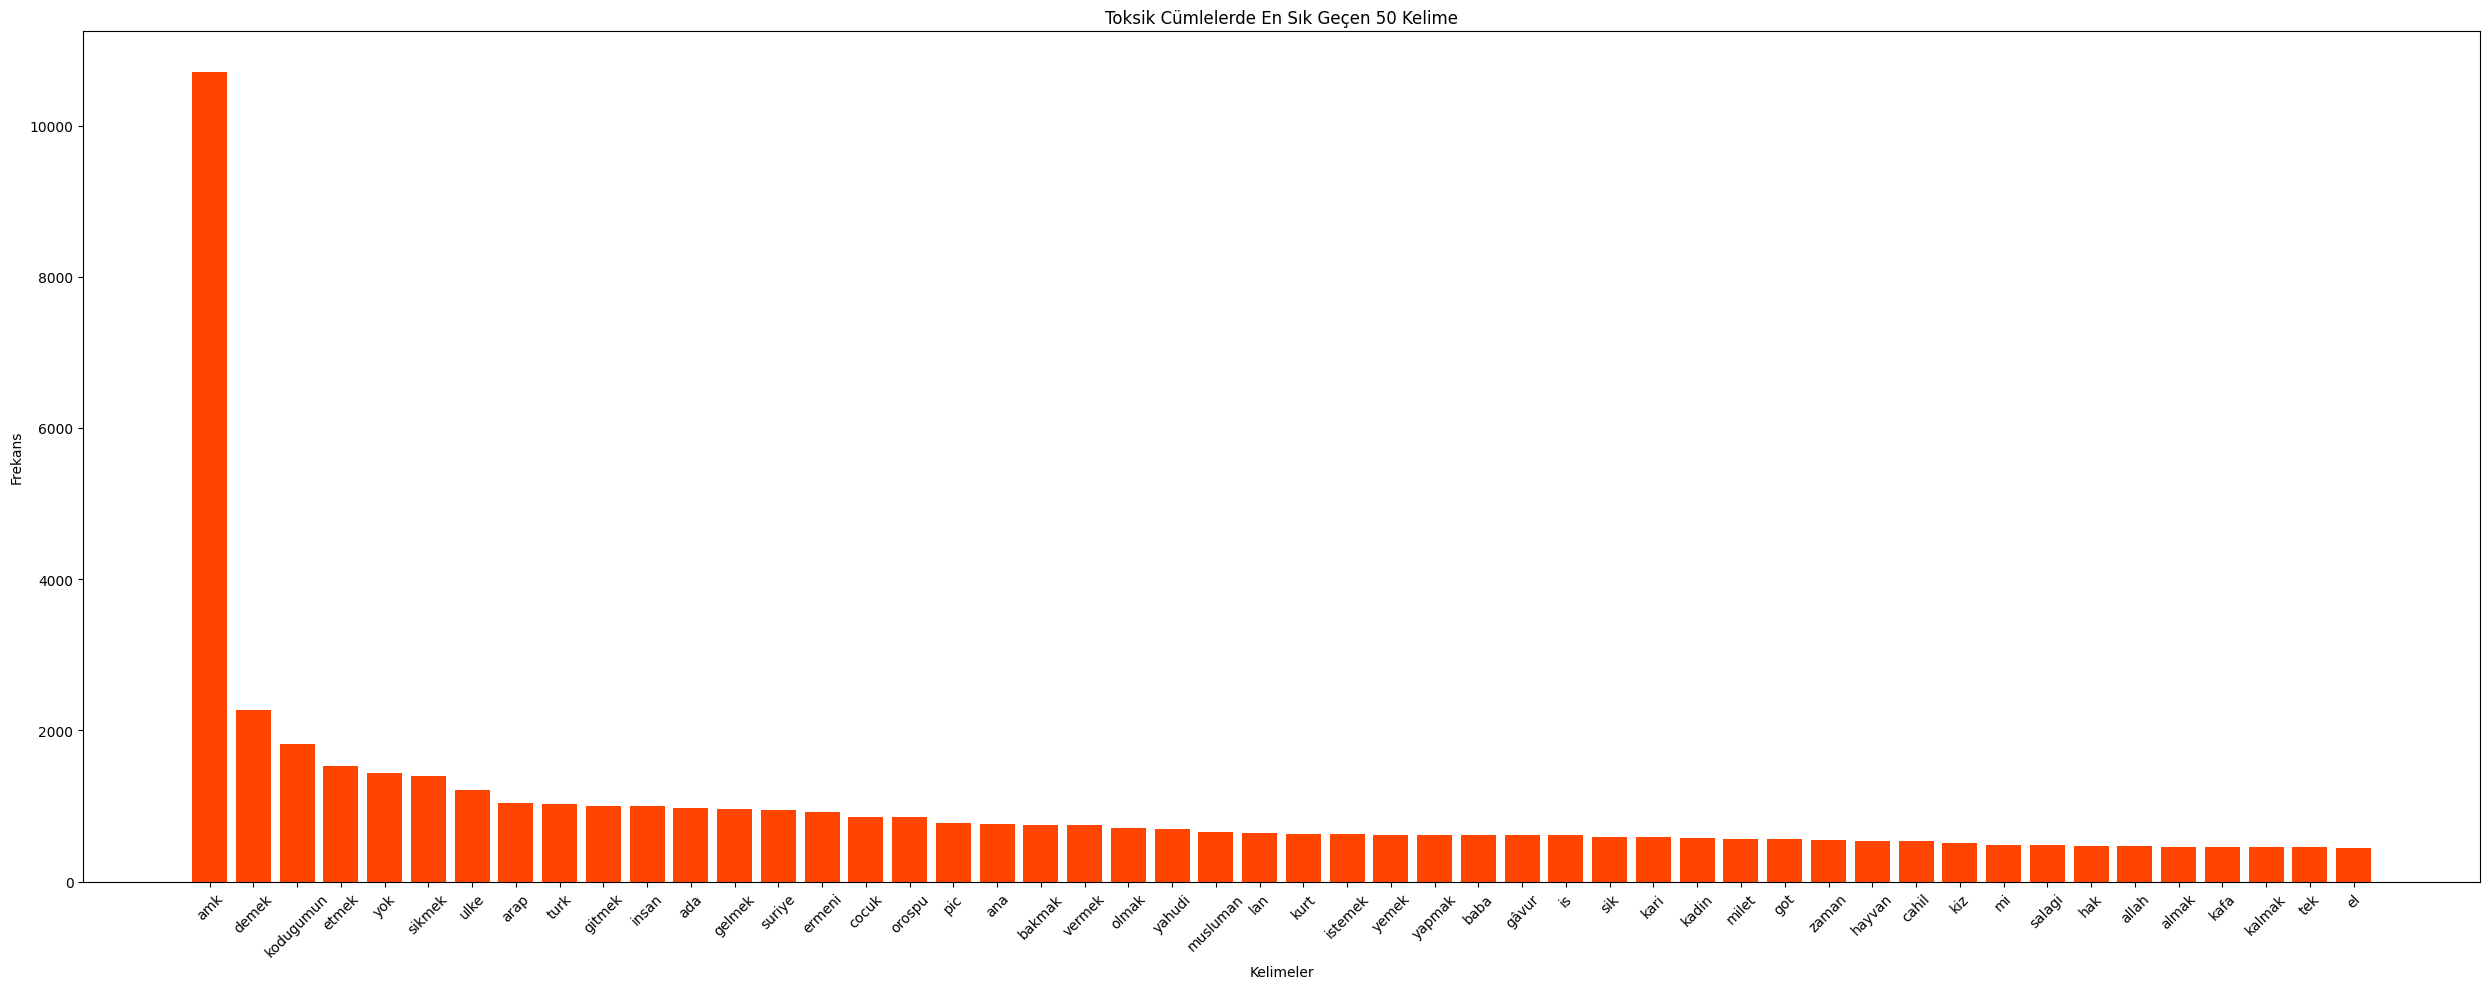

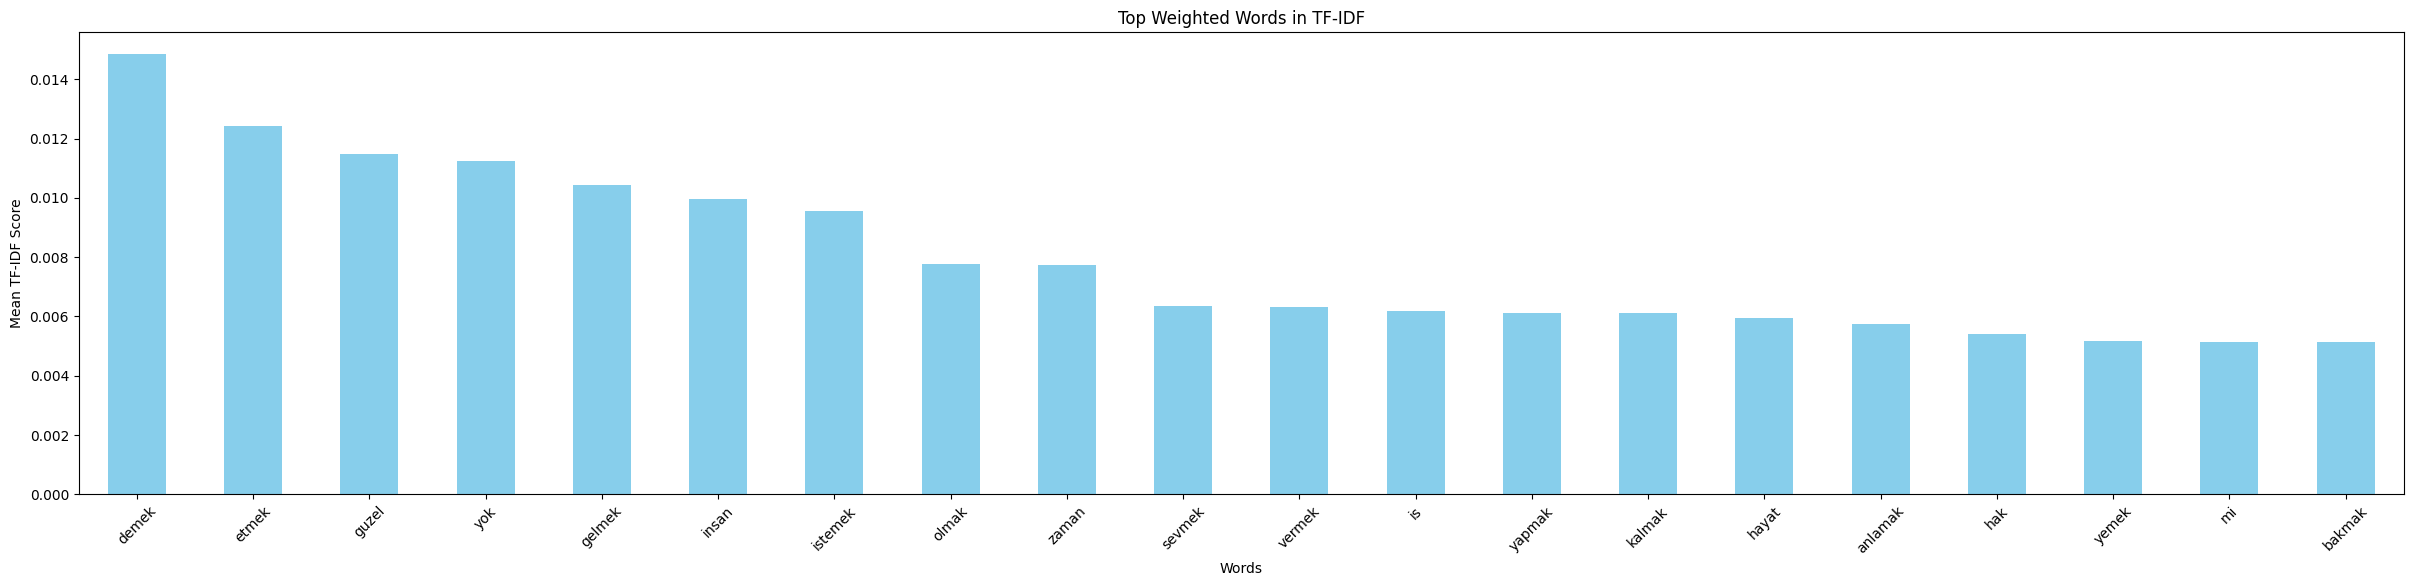

In [11]:
path= 'datasets/turkish_dataset/turkce_cumleler_kokler_corrected_50k.csv'
df = pd.read_csv(path)
toxicity = 1
contextName = 'roots'
show_frequency(path = path,toxicity = toxicity,word_count = 50, contextName = contextName)
toxic_texts = df[df["label"] == 0][contextName].dropna()
tfidf(toxic_texts)

In [4]:
toxic_texts

0             gercekten hikâye izlemek yeni yilmak giricem
1                                              cok baklava
2        1 sn dukel ataturk karma e m baslattigi siyasî...
3        konfederasyon sosyal politika bakanlik istisar...
5                 emeklilik yasa takilmak perisan coz d...
                               ...                        
32522                      mutlu etmek zaman mutlu busecim
32523    babacim babacim ozturk serengil izlemek isteme...
32524      kesin konusmak beklemek kadi potansiyel uyar...
32525       nap of star hickirmak hickirmak aglamak sark  
32526     katmak mulkiyet kanu 45 made anayapinin dis d...
Name: roots, Length: 22576, dtype: object